z_0   = 10	alpha     = 3
z_hat = 10.01	alpha_hat = 3.00
% err = 0.14%	   % err  = 0.16%


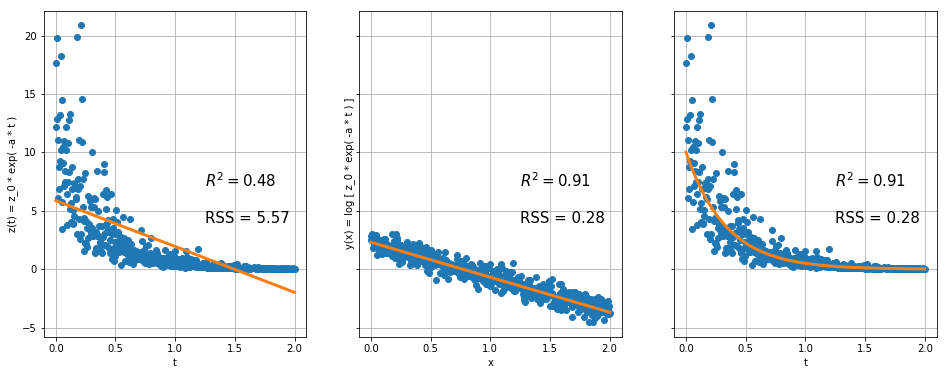

In [4]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# real params
z_0 = 10
alpha = 3

# data vectors
n = 500
t = np.linspace(0, 2, n)
z = z_0*np.exp(-alpha*t  +  np.random.normal(0, z_0/20, n))

def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    xmean = np.mean(x)
    ymean = np.mean(y)
    Sxx = np.sum((x-xmean) ** 2)
    Sxy = np.sum((x-xmean) * (y-ymean))
    Syy = np.sum((y-ymean) ** 2)
    
    beta1 = Sxy / Sxx
    beta0 = ymean - beta1*xmean
    
    SStot = Syy
    
    def predict(x):
        return beta0 + beta1*x

    SSres = np.sum((y - predict(x)) ** 2)
    rsq = 1 - SSres/SStot
    
    return beta0, beta1, rsq


# setup plotting area
fig, (tplt, xplt, x_tplt) = plt.subplots(1, 3, figsize=(16,6), sharex='col', sharey='row')


# plot original data
tplt.plot(t, z, 'o')
tplt.grid(True)
tplt.set_xlabel('t')
tplt.set_ylabel('z(t) = z_0 * exp( -a * t )')


# fit original data
t_beta0, t_beta1, t_Rsq = fit_linear(t, z)
z_hat = t_beta0 + t_beta1*t

t_RSSn = np.sum((z - z_hat) ** 2) / len(z)


# plot fit
tplt.plot(t, z_hat,'-',linewidth=3)
tplt.text(1.25, 7, "$R^2 = $"+str(np.round(t_Rsq,2)), fontsize=15)
tplt.text(1.25, 4, "RSS = "+str(np.round(t_RSSn,2)), fontsize=15)



# transform data
x = t
y = np.log(z)


# plot transformed data
xplt.plot(x, y, 'o')
xplt.grid(True)
xplt.set_xlabel('x')
xplt.set_ylabel('y(x) = log [ z_0 * exp( -a * t ) ]')


# fit transformed data
x_beta0, x_beta1, x_Rsq = fit_linear(x, y)
y_hat = x_beta0 + x_beta1*x

x_RSSn = np.sum((y - y_hat) ** 2) / len(y)


# plot fit
xplt.plot(x, y_hat,'-',linewidth=3)
xplt.text(1.25, 7, "$R^2 = $"+str(np.round(x_Rsq,2)), fontsize=15)
xplt.text(1.25, 4, "RSS = "+str(np.round(x_RSSn,2)), fontsize=15)


# tranform back
t_t = x
t_z = np.exp(y)
t_z_hat = np.exp(y_hat)


# plot in t, z space
x_tplt.plot(t_t, t_z, 'o')
x_tplt.plot(t_t, t_z_hat,'-',linewidth=3)
x_tplt.text(1.25, 7, "$R^2 = $"+str(np.round(x_Rsq,2)), fontsize=15)
x_tplt.text(1.25, 4, "RSS = "+str(np.round(x_RSSn,2)), fontsize=15)
x_tplt.grid(True)
x_tplt.set_xlabel('t')


# check paramiter estimates against original distribution
z_hat = np.exp(x_beta0)
alpha_hat = -x_beta1

print("z_0   = {}\talpha     = {}".format(z_0, alpha))
print("z_hat = {:.2f}\talpha_hat = {:.2f}".format(z_hat, alpha_hat))
print("% err = {:.2f}%\t   % err  = {:.2f}%"
          .format(100*abs(z_hat-z_0)/z_0, 100*abs(alpha_hat-alpha)/alpha))